In [1]:
import math
import io
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import os

%matplotlib inline

## Importing the data

In [2]:
suicides = pd.read_csv('master.csv')

In [3]:
suicides

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
suicides.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

## Let's clean the data 

In [5]:
suicides.isnull().sum() ##how many null values do we have for each column 

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
suicides.dropna(inplace=False)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
77,Albania,1995,male,75+ years,1,25100,3.98,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
78,Albania,1995,male,35-54 years,14,375900,3.72,Albania1995,0.619,"2,424,499,009",835,Boomers
79,Albania,1995,female,25-34 years,7,264000,2.65,Albania1995,0.619,"2,424,499,009",835,Generation X
80,Albania,1995,female,35-54 years,8,356400,2.24,Albania1995,0.619,"2,424,499,009",835,Boomers
81,Albania,1995,male,5-14 years,6,376500,1.59,Albania1995,0.619,"2,424,499,009",835,Millenials


In [7]:
## we can get rid of columns we don't need

cleaned = suicides.drop(columns=['HDI for year', 'country-year'])

In [8]:
#how many unique countries are in our dataset? 
countriesTotal = suicides['country'].unique()

In [9]:
countriesTotal

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '


# I want to compare the baby boomers that committed suicide in the oldest year in the dataset and compare them to the baby boomers that committed suicide in most recent year in the data. I want to see them for each country. 


## Here's the exploration for 1985 

In [10]:
min_year = suicides['year'].min() ## gets earliest year
max_year = suicides['year'].max() ## gets most recent year

In [11]:
data_1985 = suicides[suicides['year']==min_year] #This extracts all info for min year: 1985

In [12]:
data_1985

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
264,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,Generation X
265,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,Boomers
266,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,Silent
267,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,Generation X
268,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,G.I. Generation
269,Antigua and Barbuda,1985,female,75+ years,0,949,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,G.I. Generation
270,Antigua and Barbuda,1985,male,15-24 years,0,7667,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,Generation X
271,Antigua and Barbuda,1985,male,25-34 years,0,6194,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,Boomers
272,Antigua and Barbuda,1985,male,35-54 years,0,5970,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,Silent
273,Antigua and Barbuda,1985,male,5-14 years,0,7304,0.00,Antigua and Barbuda1985,NaN,"240,923,926",3850,Generation X


In [13]:
boomers_85 = data_1985[data_1985['generation']=='Boomers'] #extracting info pertaining to baby boomers in 1985

In [14]:
boomers_85['generation'].value_counts()

Boomers    96
Name: generation, dtype: int64

In [15]:
boomers_85.groupby(by='generation')['suicides_no'].sum()

generation
Boomers    20771
Name: suicides_no, dtype: int64

In [16]:
countries_boomers = data_1985[data_1985['generation']=='Boomers'][['suicides_no', 'country','generation']].groupby(by='country').sum()

In [17]:
countries_boomers

,suicides_no
country,
Antigua and Barbuda,0
Argentina,242
Australia,421
Austria,288
Bahamas,0
Bahrain,7
Barbados,3
Belgium,323
Brazil,1060


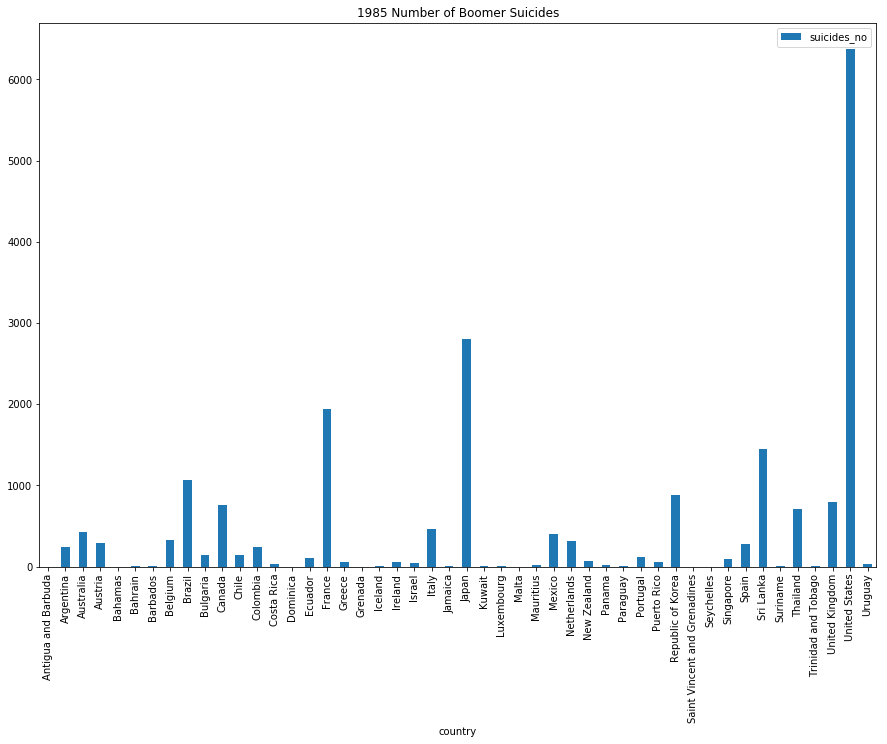

In [18]:
countries_boomers.plot.bar(title='1985 Number of Boomer Suicides',legend=True, 
                           figsize=(15,10))

## Here's the exploration for 2014

In [19]:
data_2014 = suicides[suicides['year']==max_year]

In [20]:
boomers_14 = data_2014[data_2014['generation']=='Boomers']

In [21]:
boomers_14

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers
1253,Armenia,2016,female,55-74 years,6,308349,1.95,Armenia2016,NaN,"10,546,135,160",3788,Boomers
2159,Austria,2016,male,55-74 years,290,928992,31.22,Austria2016,NaN,"390,799,991,147",46976,Boomers
2164,Austria,2016,female,55-74 years,99,1009403,9.81,Austria2016,NaN,"390,799,991,147",46976,Boomers
6621,Croatia,2016,male,55-74 years,187,480263,38.94,Croatia2016,NaN,"51,338,524,831",12905,Boomers
6625,Croatia,2016,female,55-74 years,69,551758,12.51,Croatia2016,NaN,"51,338,524,831",12905,Boomers
7089,Cyprus,2016,male,55-74 years,7,85486,8.19,Cyprus2016,NaN,"20,153,871,681",25098,Boomers
7093,Cyprus,2016,female,55-74 years,1,90294,1.11,Cyprus2016,NaN,"20,153,871,681",25098,Boomers
7409,Czech Republic,2016,male,55-74 years,319,1205832,26.45,Czech Republic2016,NaN,"195,305,084,919",19505,Boomers
7413,Czech Republic,2016,female,55-74 years,86,1358948,6.33,Czech Republic2016,NaN,"195,305,084,919",19505,Boomers


In [22]:
countries_boomers2014 = data_2014[data_2014['generation']=='Boomers'][['suicides_no', 'country','generation']].groupby(by='country').sum()

In [23]:
countries_boomers2014

,suicides_no
country,
Armenia,22
Austria,389
Croatia,256
Cyprus,8
Czech Republic,405
Grenada,0
Hungary,656
Iceland,12
Lithuania,257


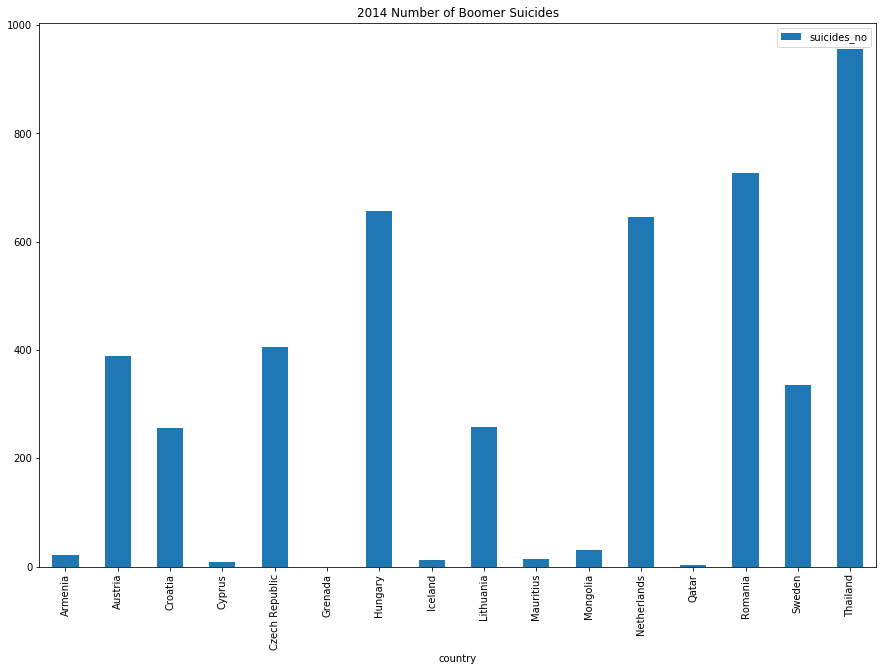

In [47]:
countries_boomers2014.plot.bar(title='2014 Number of Boomer Suicides',legend=True, 
                           figsize=(15,10))

In [81]:
## I want to write a function that can give me bar graphs to compare any how many of any generation that committed suicide in any given year 

def generation_suicides (year_of_death, generation_type): ## This function will take 2 arguments, the year(an integer), and the generation(A string) 
    yearly_data = suicides[suicides['year']==year_of_death] ## Here, we are extracting our data for the year in question
    generation_data = yearly_data[yearly_data['generation']==generation_type] ## Extracting the data for the generation in question
    generation_countries = generation_data[generation_data['generation']==generation_type][['suicides_no','country','generation']].groupby(by='country').sum() ##Takes data which was  
    generation_countries.plot.bar(title=str(year_of_death) + ' Number of '+generation_type+' Suicides per Country', 
                              figsize=(15,10))

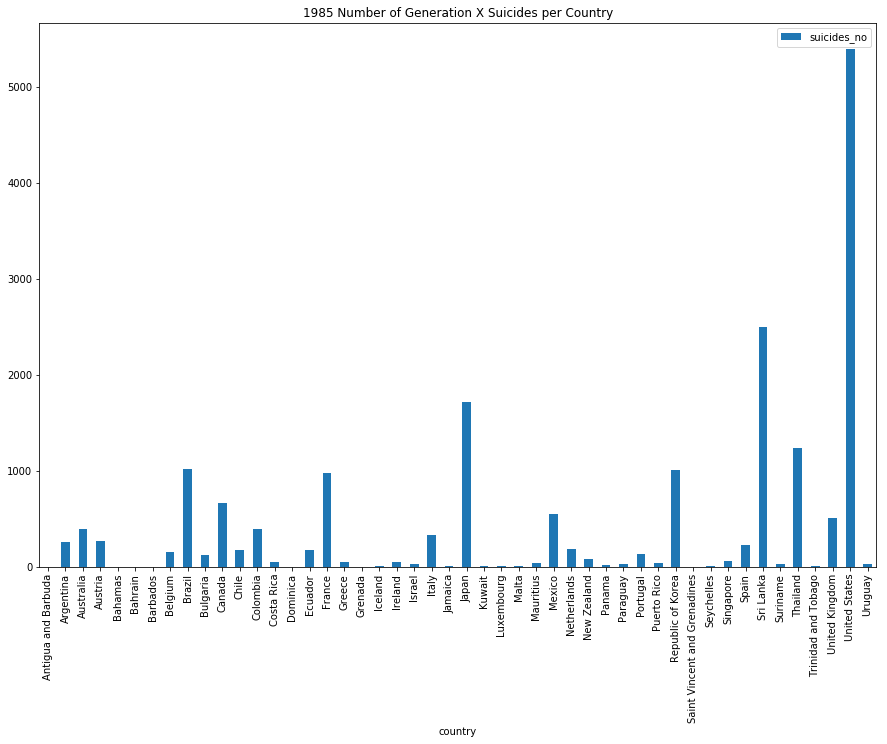

In [82]:
generation_suicides(1985, 'Generation X')